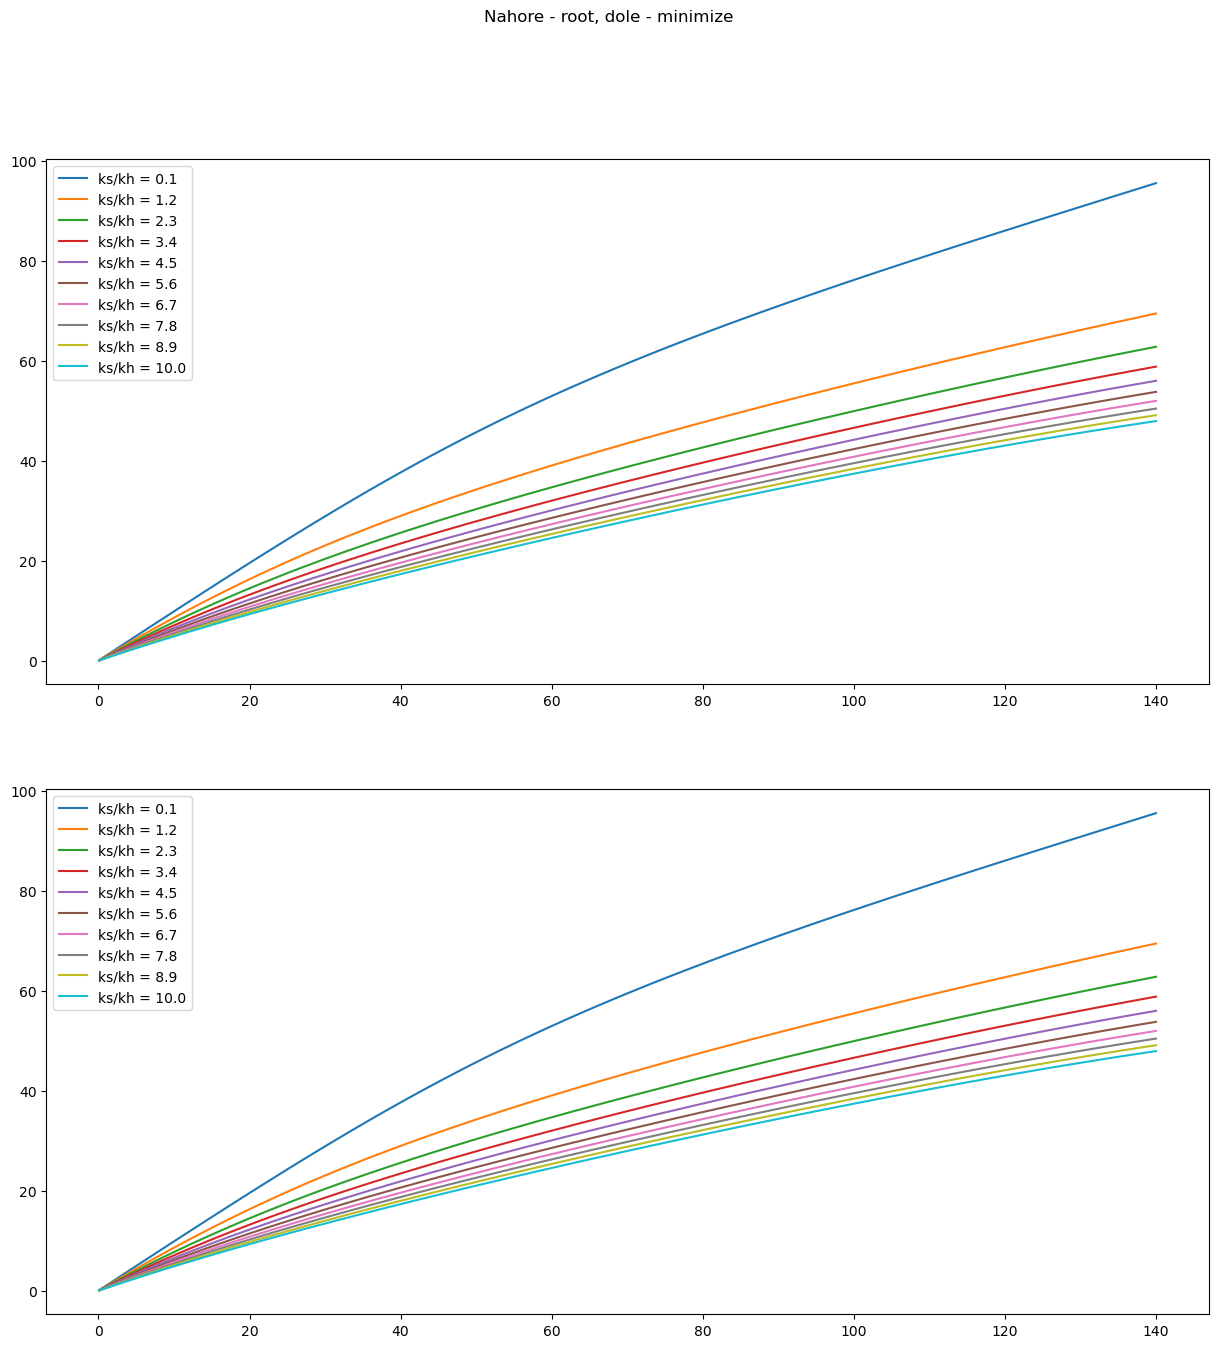

In [17]:
import numpy as np
from scipy.optimize import fsolve, minimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
# %run "classes_ipynb.ipynb"
sys.path.insert(0, "..")
import classes2
# warnings.filterwarnings('ignore')



phis,alfa,pomery,x,koefs,koefh = sp.symbols('phis,alfa,pomery,x,koefs,koefh')
a=0.5
b=0.5
c=0.5
d=0.5
model = classes2.SCHR(phis=phis,alfa=alfa,x=x,l0h=1,l0s=1,a=a,b=b,c=c,d=d)

xs, xh,xs_np,xh_np = model.geometry_init()
Fs,Fh, Us, Uh = model.nonlinear_spring_init(pomery=pomery,koefs=koefs,koefh=koefh,akt_f=True)
Fs,Fh,Us,Uh = model.thelen_03_muscle_pas_force(pomery=pomery,koefs=koefs,koefh=koefh,akt_f = False)
u_celk, dU_celk = model.potential_energy(Us,Uh,xs,xh,phis)
Uc_np, d_Uc_np = model.lambdified(u_celk,dU_celk)

koefs = 6
koefh = 3
model.graphs_scapula_position(Uc_np, d_Uc_np,koefs=koefs,koefh=koefh,init_root = 0.1)

# model.graphs_potential_energy(Uc_np)

In [6]:
alfa = 90*np.pi/180
phis = 0*np.pi/180
print(xs_np(phis,alfa))
print(xh_np(phis,alfa))

1.0
1.707106781186548
